In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic DataSet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
remove = ["PassengerId", "Cabin"]
df.drop(remove, axis = 1, inplace = True)

In [6]:
df.rename(columns = {"Sex" : "Gender"}, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Gender    891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include = "all")

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [10]:
df["Survived"].unique()

array([0, 1])

In [11]:
df["Survived"].nunique()

2

In [12]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

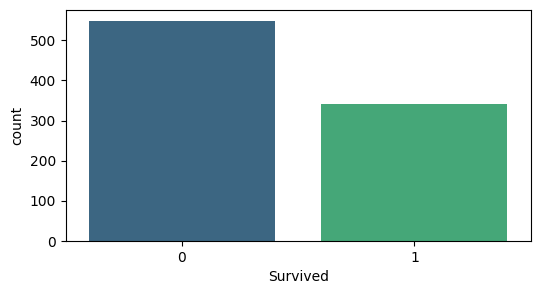

In [13]:
fig = plt.figure(figsize = (6,3))
sns.countplot(x = df["Survived"], palette = "viridis")
plt.show()

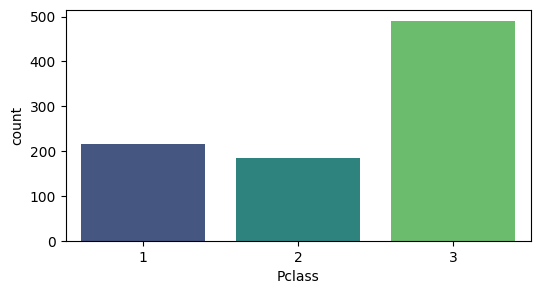

In [14]:
fig = plt.figure(figsize = (6,3))
sns.countplot(x = df["Pclass"], palette = "viridis")
plt.show()

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Gender        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

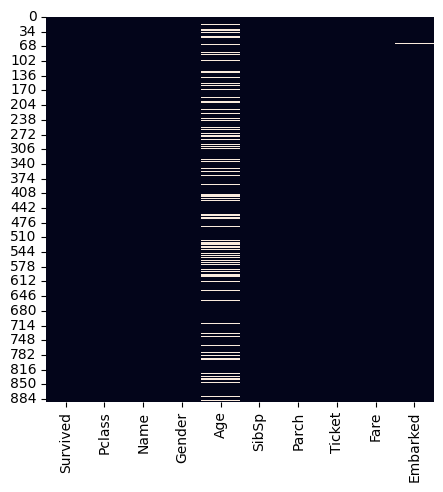

In [16]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df.isna(), cbar = None)
plt.show()

In [17]:
df.dropna(subset = ["Embarked"], inplace = True)

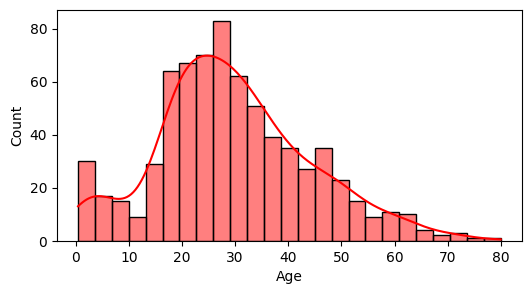

In [18]:
fig = plt.figure(figsize = (6,3))
sns.histplot(x = df["Age"], color = "red", bins = 25, kde = True)
plt.show()

In [19]:
df["Age"] = df["Age"].fillna(value = df["Age"].median())

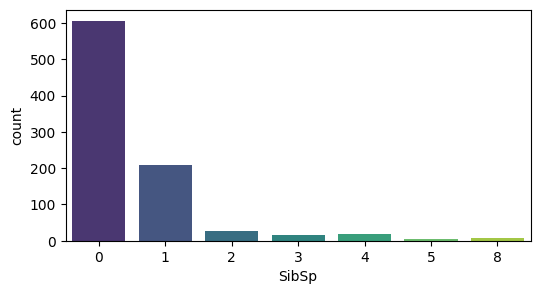

In [20]:
fig = plt.figure(figsize = (6,3))
sns.countplot(x = df["SibSp"], palette = "viridis")
plt.show()

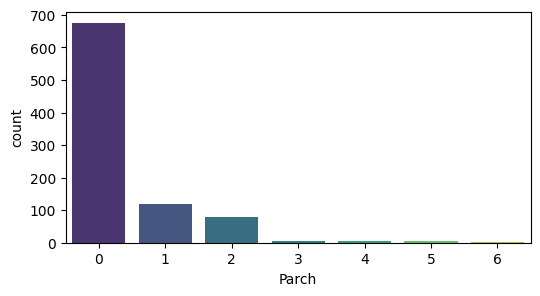

In [21]:
fig = plt.figure(figsize = (6,3))
sns.countplot(x = df["Parch"], palette = "viridis")
plt.show()

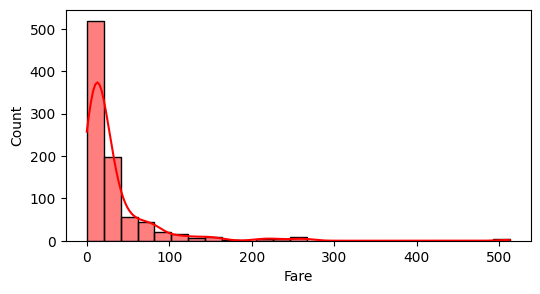

In [22]:
fig = plt.figure(figsize = (6,3))
sns.histplot(x = df["Fare"], color = "red", bins = 25, kde = True)
plt.show()

In [23]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [24]:
df["LastName"] = df["Name"].str.split(", ").str.get(0)

In [25]:
"Braund, Mr. Owen Harris".split(", ")[0]

'Braund'

In [26]:
df["LastName"].value_counts()

LastName
Andersson    9
Sage         7
Skoog        6
Carter       6
Johnson      6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 665, dtype: int64

In [27]:
df[df["LastName"] == "Sage"]

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
159,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,Sage
180,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,Sage
201,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,Sage
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,Sage
792,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,Sage
846,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,Sage
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,Sage


In [28]:
df["TicketClass"] = df["Ticket"].str.split(" ").str.get(0)

In [29]:
df["TicketClass"].value_counts()

TicketClass
PC        60
C.A.      27
STON/O    12
A/5       10
W./C.      9
          ..
113043     1
28551      1
345364     1
234818     1
370376     1
Name: count, Length: 556, dtype: int64

In [30]:
df[df["TicketClass"] == "C.A."]

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,TicketClass
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,S,Wheadon,C.A.
56,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.500,S,Rugg,C.A.
58,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.750,S,West,C.A.
66,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.500,S,Nye,C.A.
70,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.500,S,Jenkin,C.A.
93,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,S,Dean,C.A.
134,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.000,S,Sobey,C.A.
145,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.750,S,Nicholls,C.A.
161,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,S,Watt,C.A.
234,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.500,S,Leyson,C.A.
